## Effect of parameter alpha on RMSE
### y=> RMSE
### x=> $\alpha$
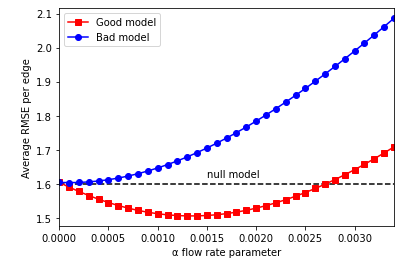


In [50]:
import pickle
from corpgame import PolymatrixGame
from genetic import *
import numpy as np
from sklearn.metrics import mean_squared_error
population = pickle.load(open('./data/optimization/population_edgeval_1.499.pickle','rb'))
new_population = create_population(1,[0.1])

Creating 1 new hypotheses


In [43]:
for i in [0,55]:
    print(population[i]['error'], evaluate_edge(population[i]), population[i]['alpha'])

1.4998973325224825 1.4998973325224825 0.0015192957631572305
4.36326337976073 4.36326337976073 0.011593183444243184


In [54]:
Y=[]
A = list(np.arange(0,0.0035,0.0001))
for k in [population[1], population[55],new_population[0]]:
    hypothesis = k
    y = []
    for alpha in A:
        hypothesis['alpha']=alpha
        err = evaluate_edge(hypothesis)
        err_net = evaluate(hypothesis)
        print(alpha, err, err_net)
        y.append(err)
    Y.append(y)

0.0 1.6042516062751286 11.056420959987207
0.0001 1.5904665505006328 10.979768846259953
0.0002 1.5776350701693143 10.91019757435785
0.00030000000000000003 1.5657867538676131 10.84784177438353
0.0004 1.5549491188299593 10.792824894873016
0.0005 1.5451471588196315 10.745258042947537
0.0006000000000000001 1.5364029202924783 10.705238900371171
0.0007 1.5287351277667551 10.672850738670599
0.0008 1.5221588779330848 10.648161555399994
0.0009000000000000001 1.5166854186294083 10.631223351713784
0.001 1.5123220236211352 10.62207156867152
0.0011 1.5090719677263627 10.62072469622248
0.0012000000000000001 1.5069345999976123 10.627184064729688
0.0013000000000000002 1.505905506280969 10.641433824362935
0.0014 1.505976747293632 10.66344111291736
0.0015 1.5071371549258412 10.693156407815234
0.0016 1.5093726679976416 10.730514053442125
0.0017000000000000001 1.5126666890792317 10.775432950759907
0.0018000000000000002 1.5170004458590225 10.82781739250508
0.0019 1.5223533434173384 10.88755802435966
0.002 1

In [60]:

names = ['Good model', '', 'Bad model']
results = {names[i]:[] for i in range(len(Y))}
for i, y in enumerate(Y):
    results[names[i]] = y
del results['']
results

{'Good model': [1.6042516062751286,
  1.5904665505006328,
  1.5776350701693143,
  1.5657867538676131,
  1.5549491188299593,
  1.5451471588196315,
  1.5364029202924783,
  1.5287351277667551,
  1.5221588779330848,
  1.5166854186294083,
  1.5123220236211352,
  1.5090719677263627,
  1.5069345999976123,
  1.505905506280969,
  1.505976747293632,
  1.5071371549258412,
  1.5093726679976416,
  1.5126666890792317,
  1.5170004458590225,
  1.5223533434173384,
  1.5287032971105545,
  1.5360270391300102,
  1.5443003948321796,
  1.553498527437787,
  1.563596151588589,
  1.574567717547127,
  1.5863875686029174,
  1.5990300746136346,
  1.6124697446725769,
  1.626681321754781,
  1.6416398619365125,
  1.657320800469288,
  1.673700006663945,
  1.690753829230553,
  1.7084591334419748],
 'Bad model': [1.6042516062751286,
  1.603645481898532,
  1.6041392435920645,
  1.6057308866600302,
  1.6084145766913043,
  1.6121807704162356,
  1.6170164145586294,
  1.6229052121874272,
  1.6298279429784859,
  1.6377628219

Text(0, 0.5, 'Average RMSE per edge')

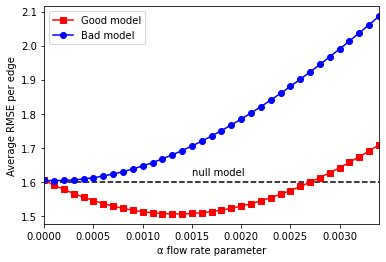

In [74]:
import pandas as pd
style = ['rs-','bo-','y^-']
df = pd.DataFrame(results, index=A)
ax = df.plot.line(style=style)
ax.hlines(1.6,0.0,0.0035, linestyles='dashed')
ax.annotate('null model', (0.0015, 1.62))
ax.set_xlabel('α flow rate parameter')
ax.set_ylabel('Average RMSE per edge')

In [13]:
population = population[0:10]
population = mutate_population(population)
population.extend(create_population(30))

In [5]:
best = 1000

#population = create_population(50)

for i in range(3):
    print('1. Evaluating')
    for i, p in enumerate(population):
        if i%5==0:
            print(f"{i}/{len(population)}")
        if population[i]['error'] == None:
            population[i]['error'] = evaluate(p)
    print('2. Sorting')
    population.sort(key=lambda x: x['error'])
    print('TOP 10 Error rates:')
    for i, p in enumerate(population[0:10]):
        print(i, p['error'])
    population = population[0:20]
    if best!=population[0]['error']:
        best = population[0]['error']
        pickle.dump(population, open(f'./data/optimization/population_alpha_{int(best)}.pickle','wb'))
    population = remove_clones(population)
    print('3. Expanding')
    population = mutate_population(population)
    population.extend(create_population(30))
    print()

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.9111111111111
1 149.9111111111111
2 149.9111111111111
3 150.9222222222222
4 151.77777777777777
5 153.05555555555554
6 153.05555555555554
7 153.05555555555554
8 154.2111111111111
9 154.72222222222223
3. Expanding

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.9111111111111
1 150.9222222222222
2 151.62222222222223
3 151.77777777777777
4 152.28888888888892
5 152.28888888888892
6 152.28888888888892
7 156.65555555555557
8 156.65555555555557
9 156.65555555555557
3. Expanding

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.76666666666665
1 149.9111111111111
2 150.9222222222222
3 151.62222222222223
4 152.51111111111112
5 152.51111111111112
6 152.51111111111112
7 156.8
8 156.8
9 156.8
3. Expanding



In [18]:
for i, p in enumerate(population):
    if i%5==0:
        print(f"{i}/{len(population)}")
    if population[i]['error'] == None:
        population[i]['error'] = evaluate(p)
print('2. Sorting')
population.sort(key=lambda x: x['error'])
print('TOP 10 Error rates:')
for i, p in enumerate(population[0:10]):
    print(i, p['error'])
for p in population:
    print(p['alpha'])

0/47
5/47
10/47
15/47
20/47
25/47
30/47
35/47
40/47
45/47
2. Sorting
TOP 10 Error rates:
0 154.2111111111111
1 156.33333333333331
2 156.33333333333331
3 156.33333333333331
4 157.95555555555558
5 159.6222222222222
6 159.6222222222222
7 159.6222222222222
8 159.6222222222222
9 163.06666666666666
0.11923992359246072
0.1921139637210897
0.1921139637210897
0.1921139637210897
0.10593274773105099
0.03514029590712442
0.03514029590712442
0.03514029590712442
0.0485439789952441
0.09971520767086384
0.09971520767086384
0.09971520767086384
0.08920101856920626
0.10059547198402696
0.10059547198402696
0.10059547198402696
0.14277526012764186
0.14277526012764186
0.14277526012764186
0.20895278155145425
0.2297221555106923
0.22862797332132567
0.27136580005712174
0.20868709401568497
0.3504182111166104
0.32399790047468613
0.2232400240727539
0.4135710561033217
0.2929905373099607
0.24595820050323136
0.4205203201514498
0.46662593762580595
0.4700081064834618
0.45170249218445147
0.5987528246200002
0.5654015172311275

In [19]:
for i, p in enumerate(population[0:10]):
    print(i, p['error'], p['alpha'])

0 154.2111111111111 0.11923992359246072
1 156.33333333333331 0.1921139637210897
2 156.33333333333331 0.1921139637210897
3 156.33333333333331 0.1921139637210897
4 157.95555555555558 0.10593274773105099
5 159.6222222222222 0.03514029590712442
6 159.6222222222222 0.03514029590712442
7 159.6222222222222 0.03514029590712442
8 159.6222222222222 0.0485439789952441
9 163.06666666666666 0.09971520767086384


In [8]:
population[3]

{'starting_state': array([[  0,  29],
        [ 28, 190],
        [ 10,  74],
        [ 70,  69],
        [177, 144],
        [ 42, 114],
        [ 99,  13],
        [104,  78],
        [141,  99],
        [118, 166],
        [184, 164],
        [142,  33],
        [164,  73],
        [132,  78],
        [ 86,  21],
        [ 25, 119],
        [107,  13],
        [ 22, 123]]),
 'strategies': [array([[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]]),
  array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]]),
  array([[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]]),
  array([[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]),
  array([[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]]),
  array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]]),
  array([[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]]),
  array([[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]),
  a

In [224]:
float(np.random.rand(1))

0.5071126015216765

In [201]:
population = pickle.load(open('./data/optimization/population_276.pickle','rb'))
for i, p in enumerate(population):
        print(i, p['error'])

0 276.20000000000005
1 299.3222222222222
2 308.9
3 310.46666666666664
4 325.37777777777774
5 341.3444444444445
6 341.64444444444445
7 344.67777777777775
8 347.2444444444444
9 352.6333333333333
10 352.99999999999994
11 353.1777777777778
12 353.4222222222222
13 354.6333333333333
14 355.53333333333336
15 356.94444444444446
16 357.79999999999995
17 359.5111111111111
18 359.5333333333333
19 360.4333333333333


In [163]:
population.sort(key=lambda x: x['error'])
print('Error rates:')
for i, p in enumerate(population[0:20]):
    print(i, p['error'])
trimmed_populations = population[0:20]

Error rates:
0 316.28888888888895
1 343.06666666666666
2 345.19999999999993
3 345.19999999999993
4 354.96666666666664
5 358.8
6 364.91111111111115
7 369.5777777777778
8 376.0444444444445
9 380.0777777777777
10 387.25555555555553
11 387.81111111111113
12 388.8
13 390.1
14 396.4888888888889
15 397.55555555555554
16 403.6333333333333
17 405.8
18 409.5333333333333
19 414.3


In [206]:
population = pickle.load(open('./data/optimization/population_250.pickle','rb'))

In [10]:
hypothesis = population[0]
strategies = hypothesis['strategies']
starting_state = hypothesis['starting_state']
game_settings = {
    "start_populations_matrix": list(starting_state),
    "topology": "fully_connected",
    'alpha': hypothesis['alpha'],
    'log_level': "warning"
}
game = PolymatrixGame(**game_settings)
outcomes = []
for iteration, strategy in enumerate(strategies):
    strategy = strategy[0]
    game.play(strategy)
    payoff = game.payoff_matrix.sum(axis=1).transpose().reshape(n,1)
    outcomes.append(payoff)
y_pred = np.hstack(outcomes)
y_pred

array([[-7., -6.,  5., -4., -8.,  4.,  5., -6., -4., -5.],
       [ 7.,  4.,  5., -4.,  4., -5.,  5., -6., -4., -5.],
       [ 7.,  4.,  5.,  8.,  4.,  3.,  3.,  2.,  3., -5.],
       [ 7.,  5.,  5.,  8.,  4.,  3.,  3.,  8., -4.,  3.],
       [-1., -3., -8.,  2., -2., -6., -5., -2., -4.,  5.],
       [-1., -3., -8., -4., -2., -5., -5., -6., -5., -5.],
       [-7., -3., -8., -4.,  4.,  3., -5., -6.,  3.,  3.],
       [-7., -6.,  5., -4.,  4., -5.,  5.,  8., -4.,  5.],
       [ 7.,  4.,  2.,  2.,  4.,  4.,  5.,  8.,  3.,  5.],
       [ 7.,  4.,  5., -4.,  4.,  4., -5.,  8.,  6.,  5.],
       [ 7.,  4.,  2.,  8.,  4.,  3.,  3.,  8.,  3.,  3.],
       [-7.,  4.,  5., -4., -8.,  4., -5., -6.,  6., -5.],
       [ 3.,  5.,  2.,  2.,  4.,  3.,  5.,  8.,  6.,  3.],
       [ 7., -6.,  5.,  8., -8.,  4., -5., -6.,  6., -5.],
       [-7., -3., -8., -4., -2., -5., -5., -6., -4., -5.],
       [-7., -6., -8.,  2.,  4.,  3.,  3.,  2.,  3.,  5.],
       [-7., -3., -3., -4., -8., -6., -5., -6., -5., -5.

In [15]:
mean_squared_error(y_pred, y_true)

149.76666666666665

In [12]:
evaluate(population[0])

149.76666666666665

In [210]:
from file_read_backwards import FileReadBackwards

with FileReadBackwards("CbCM.log", encoding="utf-8") as frb:
    counter = 0
    for l in frb:
        print(l)
        counter +=1
        if counter==1000:
            break



2020-06-05 02:27:59,000 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=-1
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 2. -3.] [-2.  3.]
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 2 [ 2. -3.] [-2.  3.]
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 3 [ 0. -3.] [0. 3.]
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=3
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payo

2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 13 should get [-7. 15.]
2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 13 old state [20 61]
2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 new state [23 44]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 should get [-14.  15.]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 old state [37 29]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 new state [15 -4]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 should get [20.  0.]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 old sta

2020-06-05 02:27:58,947 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 1. -5.] [-1.  5.]
2020-06-05 02:27:58,947 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 1 [ 1. -5.] [-1.  5.]
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 5 [ 0. -5.] [0. 5.]
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=5
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 2. -5.] [-2.  5.]
2020-06-05 02:27:58,945 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 2 [ 2. -5.] [-2.  5.]
2020-06-05 02:27:58,945 - CbCM - DEBUG - <class 'corpgame.Polyma

2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [-3.  0.] [3. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 0 [-3.  0.] [3. 0.]
2020-06-05 02:27:58,913 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,913 - CbCM - DEBUG - <class 'corpgame.Polyma

2020-06-05 02:27:58,885 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,885 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,884 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 2.] [ 0. -2.]
2020-06-05 02:27:58,884 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 2 [0. 2.] [ 0. -2.]
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_pay

2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [3. 0.] [-3.  0.]
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 3 [3. 0.] [-3.  0.]
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=3
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0.

2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 1 [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,823 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,823 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pa

2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 1 [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,779 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0]